In [31]:
from extractFeatures import *
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore",FutureWarning)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import AgglomerativeClustering
# bottom up approach --> each element starts as its own cluster and is then successively merged with other elements 
# ward linkage minimizes sum of squared distances within each cluster 
# setting the distance threshold to 0 ensures that the whole tree is computed 
model = AgglomerativeClustering(linkage="ward",distance_threshold=0, n_clusters=None)

'''
Code for dendrogram visualization comes from the following Scikit-learn documentation:  
https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-download-auto-examples-cluster-plot-agglomerative-dendrogram-py
'''
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    return dendrogram(linkage_matrix, **kwargs)

TFIDF vectorization and clustering of the word contexts around keywords in the Charity Sermons dataset

In [42]:
tcpIDs = [_ for _ in tcpIDs if len(charity_citations[_])>0]
contexts = getTexts('/Users/amycweng/Digital Humanities/charityContexts',tcpIDs)
vector = TfidfVectorizer(norm=None, sublinear_tf=True)
tfidf_results = vector.fit_transform(contexts.values())
df = pd.DataFrame(tfidf_results.toarray(), index=contexts.keys(), columns=vector.get_feature_names()) 
clusters = model.fit(df)
updatedidAuthor = []
for tcpID in tcpIDs: 
    for entry in idAuthor: 
        if tcpID in entry: 
            updatedidAuthor.append(entry)
            break


Text(0.5, 1.0, 'Context Windows Around Keywords in the Charity Sermons Dataset')

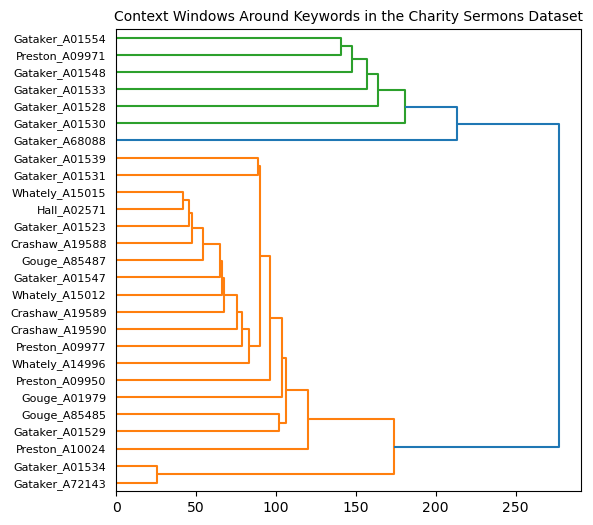

In [49]:
fig, axes = plt.subplots(figsize=(6, 6))
gram = plot_dendrogram(clusters, 
                       truncate_mode=None, # show the entire tree 
                       labels = updatedidAuthor, # label based on TCP ids 
                       leaf_font_size=8, # adjust leaf node size 
                       ax=axes,
                       orientation='right')
plt.title("Context Windows Around Keywords in the Charity Sermons Dataset",fontsize = 10)

TFIDF vectorization and clustering of all marginal citations in the Charity Sermons Dataset

In [14]:
cited = {}
for tcpID, c_list in all_citations.items(): 
    citations = []
    if len(c_list) == 0: 
        continue
    for passage in c_list: 
        '''Transform the citation into one unit using underscores'''
        passage = re.sub(':','_',passage)
        passage = passage.split(' ')
        passage = '_'.join(passage)
        citations.append(passage)  
    cited[tcpID] = ' '.join(citations)
'''vectorization'''
vector = TfidfVectorizer(norm=None, sublinear_tf=True)
results = vector.fit_transform(cited.values())
df = pd.DataFrame(results.toarray(), index=cited.keys(), columns=vector.get_feature_names()) 

Text(0.5, 1.0, 'Hierarchical Clustering by Marginal Scriptural Citations')

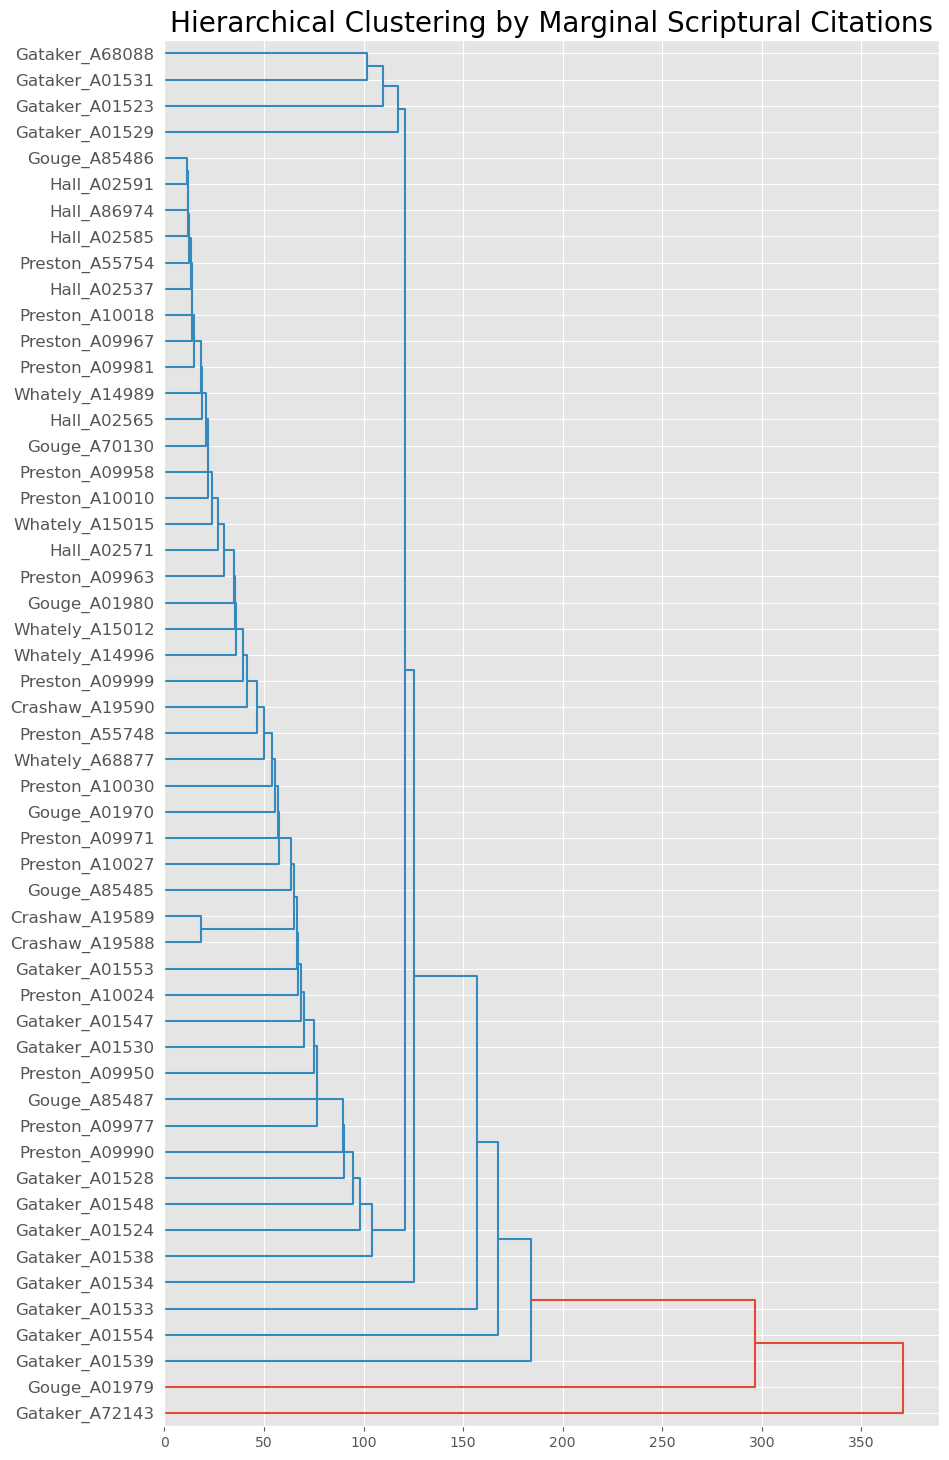

In [10]:
clusters = model.fit(df)
keys = []
for tcpID in cited.keys():
    for entry in idAuthor: 
        if tcpID in entry: 
            keys.append(entry)
fig, axes = plt.subplots(figsize=(10, 18))
gram = plot_dendrogram(clusters, 
                       truncate_mode=None, # show the entire tree 
                       labels = keys, # label based on TCP ids 
                       leaf_font_size=12, # adjust leaf node size 
                       ax=axes,
                       orientation='right')
plt.title("Hierarchical Clustering by Marginal Scriptural Citations",fontsize = 20)

TFIDF vectorization and clustering of charity-related marginal citations in the Charity Sermons dataset

In [3]:
cited = {}
for tcpID, c_list in charity_citations.items(): 
    if len(c_list) == 0: 
        continue
    citations = []
    for passage in c_list: 
        '''Transform the citation into one unit using underscores'''
        passage = re.sub(':','_',passage)
        passage = passage.split(' ')
        passage = '_'.join(passage)
        citations.append(passage)        
    cited[tcpID] = ' '.join(citations)
'''Tfidf vectorization'''
vector = TfidfVectorizer(norm=None, sublinear_tf=True)
tfidf_results = vector.fit_transform(cited.values())
df = pd.DataFrame(tfidf_results.toarray(), index=cited.keys(), columns=vector.get_feature_names()) 

Text(0.5, 1.0, 'Hierarchical Clustering of Texts by Charity-Related Biblical Citations')

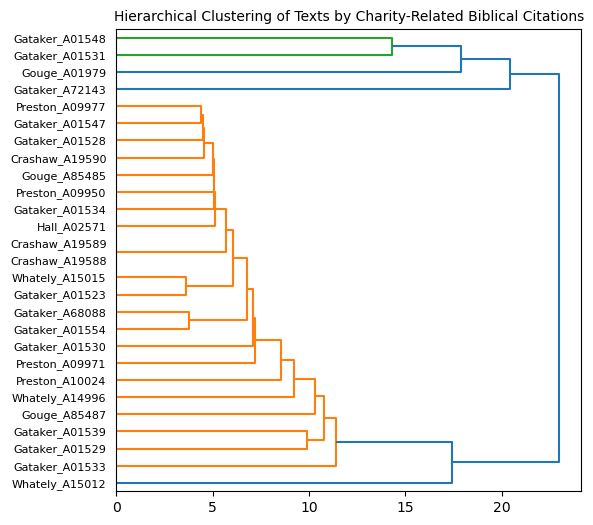

In [4]:
clusters = model.fit(df)
keys = []
for tcpID in cited.keys():
    for entry in idAuthor: 
        if tcpID in entry: 
            keys.append(entry)
fig, axes = plt.subplots(figsize=(6, 6))
gram = plot_dendrogram(clusters, 
                       truncate_mode=None, # show the entire tree 
                       labels = keys, # label based on TCP ids 
                       leaf_font_size=8, # adjust leaf node size 
                       ax=axes,
                       orientation='right')
plt.title("Hierarchical Clustering of Texts by Charity-Related Biblical Citations",fontsize = 10)